In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.genfromtxt("13 months smooth.csv", delimiter=';')
år = data[6:-6,0]
måned = data[6:-6,1]
dato_fraction = data[6:-6,2]
SN = data[6:-6,3]
std = data[6:-6,4]
N = data[6:-6,5]
definite = data[6:-6,6]

for i in range(len(N)):
    if N[i]==0:
        N[i]=1

usikkerhed = abs(std)/np.sqrt(abs(N))

Proxy_minimum_dato = np.array([1755+2/13 , 1766+6/13 , 1775+6/13 , 1784+9/13 , 1798+4/13 , 1810+7/13 , 1823+5/13 , 1833+11/13 , 1843+7/13, 1855+12/13,
                    1867+3/13 , 1878+12/13 , 1890+3/13 , 1902+1/13 , 1913+7/13 , 1923+8/13 , 1933+9/13 , 1944+2/13 , 1954+4/13 , 1964+10/12,
                    1976+3/13 , 1986+9/13 , 1996+8/13 , 2008+12/13 , 2019+12/13])

In [3]:
Cykler = []
for k in range(len(Proxy_minimum_dato)-1):
    Maske=(Proxy_minimum_dato[k] < dato_fraction) & (dato_fraction < Proxy_minimum_dato[k+1])
    x = dato_fraction[Maske]
    y = SN[Maske]
    u = usikkerhed[Maske]
    Cykler.append([x,y,u])
    if k == 23:
        Maske=(Cykler[23][0][-1] < dato_fraction) & (dato_fraction < 2025)
        x = dato_fraction[Maske]
        y = SN[Maske]
        u = usikkerhed[Maske]
        Cykler.append([x,y,u])

print(Cykler[24][0])
print(Cykler[24][0][0])

[2019.958 2020.042 2020.124 2020.206 2020.288 2020.373 2020.455 2020.54
 2020.624 2020.706 2020.791 2020.873 2020.958 2021.042 2021.122 2021.204
 2021.286 2021.371 2021.453 2021.538 2021.623 2021.705 2021.79  2021.873
 2021.958 2022.042 2022.122 2022.204 2022.286 2022.371 2022.453 2022.538
 2022.623 2022.705 2022.79  2022.873 2022.958 2023.042 2023.122 2023.204
 2023.286 2023.371 2023.453 2023.538]
2019.958


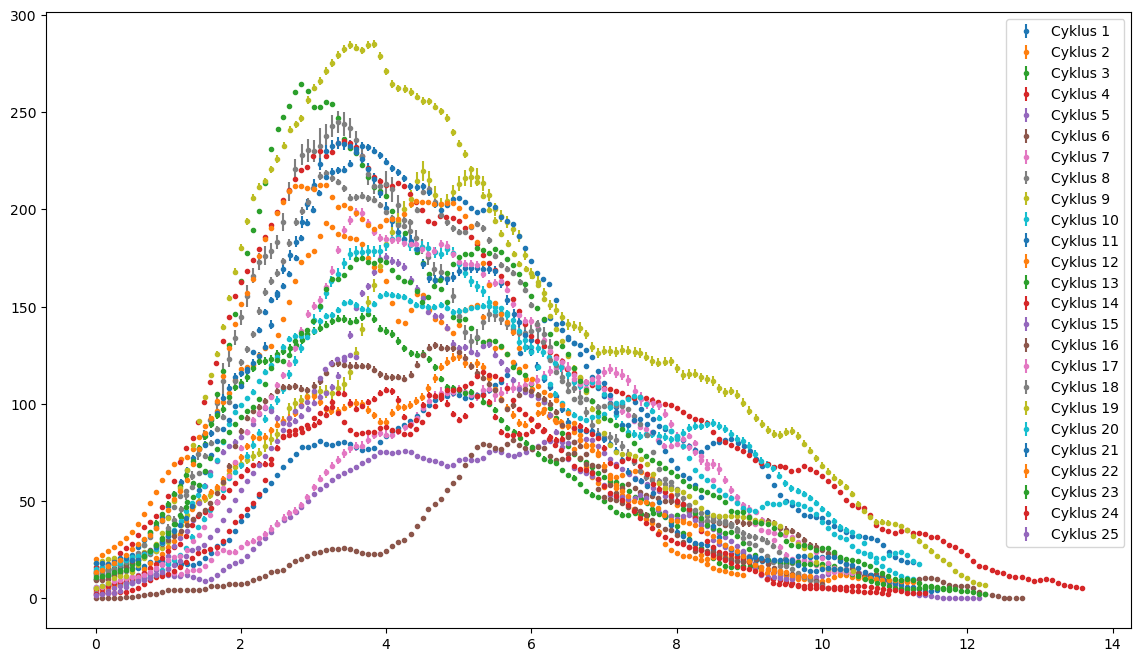

In [4]:
plt.figure(figsize=[14,8])
for i in range(len(Cykler)):
    plt.errorbar(Cykler[i][0]-Cykler[i][0][0],Cykler[i][1], fmt='.', yerr=Cykler[i][2],label=f'Cyklus {i+1}')
plt.legend()

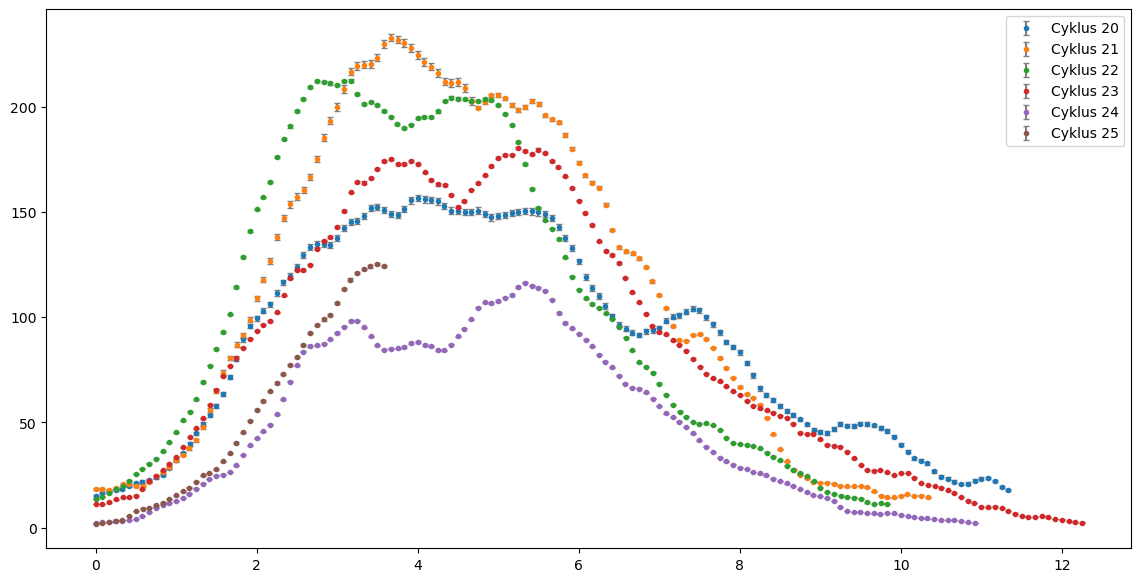

In [5]:
def plot(cyklus_start, cyklus_slut):
    plt.figure(figsize=[14,7])
    for i in np.arange(cyklus_start, cyklus_slut+1):
        plt.errorbar(Cykler[i-1][0]-Cykler[i-1][0][0],Cykler[i-1][1], fmt='.', yerr=Cykler[i-1][2],label=f'Cyklus {i}', capsize=2, ecolor='grey')
    plt.legend()

plot(20,25)

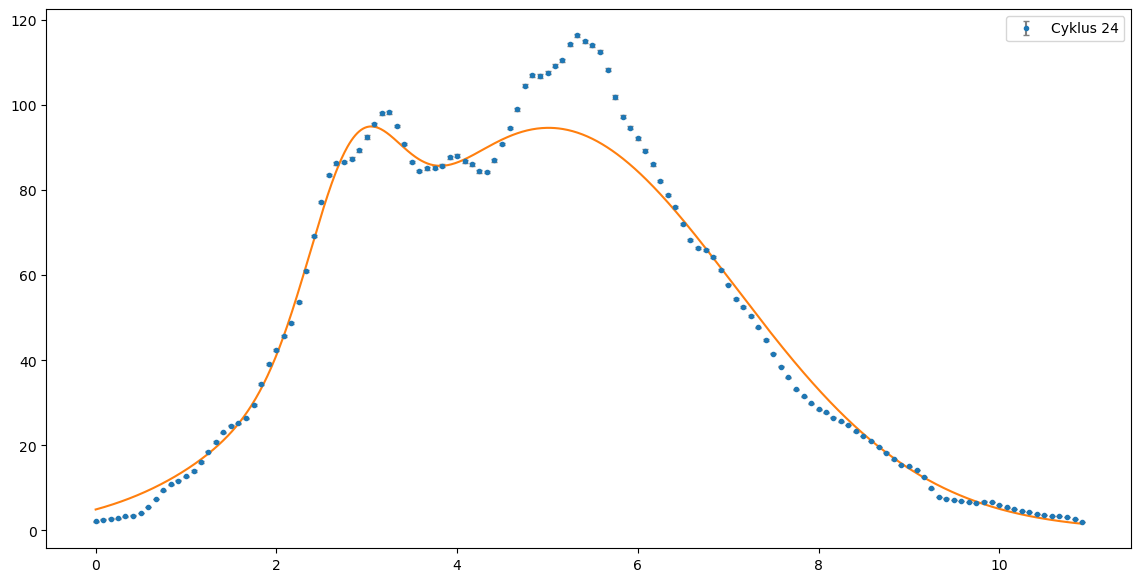

In [15]:
def funktion(x, mu1, mu2, mu3, sigma1, sigma2, sigma3, s1 , s2 , s3):
    return s1/(sigma1*np.sqrt(2*np.pi))*np.exp(-((x-mu1)**2/(2*sigma1**2))) + s2/(sigma2*np.sqrt(2*np.pi))*np.exp(-((x-mu2)**2/(2*sigma2**2))) + s3/(sigma3*np.sqrt(2*np.pi))*np.exp(-((x-mu3)**2/(2*sigma3**2)))

par, cov = curve_fit(funktion, Cykler[23][0]-Cykler[23][0][0], Cykler[23][1], p0=[3.1, 4, 5.9, 0.01, 0.02, 1, 10, 1, 100], sigma=Cykler[23][2], absolute_sigma=True, maxfev=80000)
xx=np.linspace(0, (Cykler[23][0]-Cykler[23][0][0])[-1], 1000)
yy = funktion(xx, *par)
plot(24, 24)
plt.plot(xx,yy)

In [7]:
def fit(cyklus, p0=[]):
    par, cov = curve_fit(funktion, Cykler[cyklus-1][0]-Cykler[cyklus-1][0][0], Cykler[cyklus-1][1], p0=[3.1, 5.9, 0.01, 0.02, 100, 1000], sigma=Cykler[cyklus-1][2], absolute_sigma=True, maxfev=80000)
    xx=np.linspace(0, (Cykler[cyklus-1][0]-Cykler[cyklus-1][0][0])[-1], 1000)
    yy = funktion(xx, *par)
    plot(cyklus, cyklus)
    plt.plot(xx,yy, label=f'Fit for cyklus {cyklus}')
    plt.legend()

fit(24, p0=[3.1, 5.9, 0.01, 0.02, 100, 1000])

TypeError: funktion() missing 3 required positional arguments: 's1', 's2', and 's3'

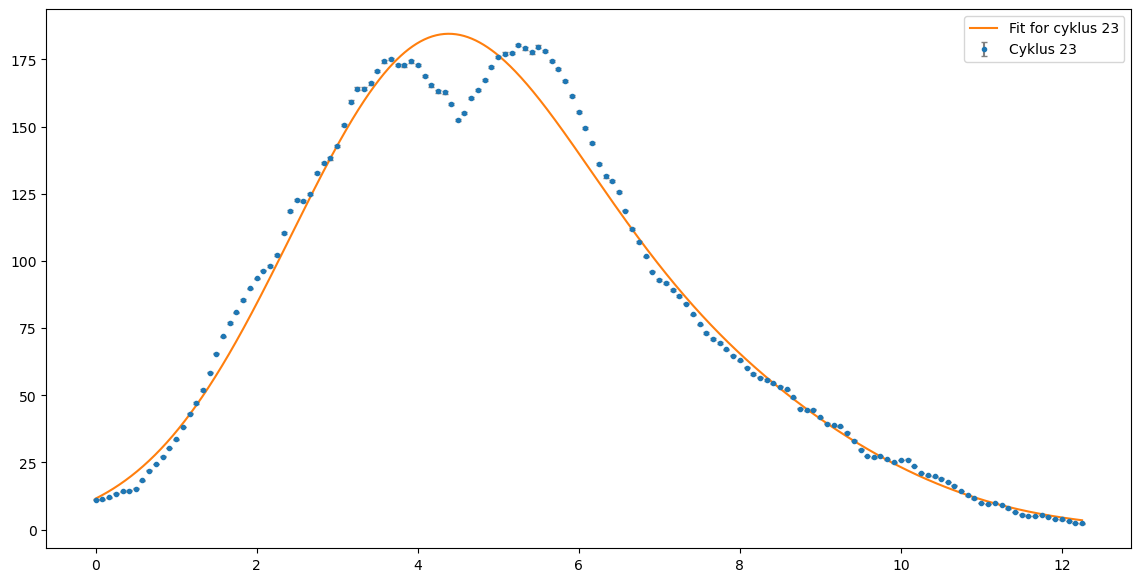

In [ ]:
fit(23, p0=[3, 6, 0.001, 0.001, 100, 100])

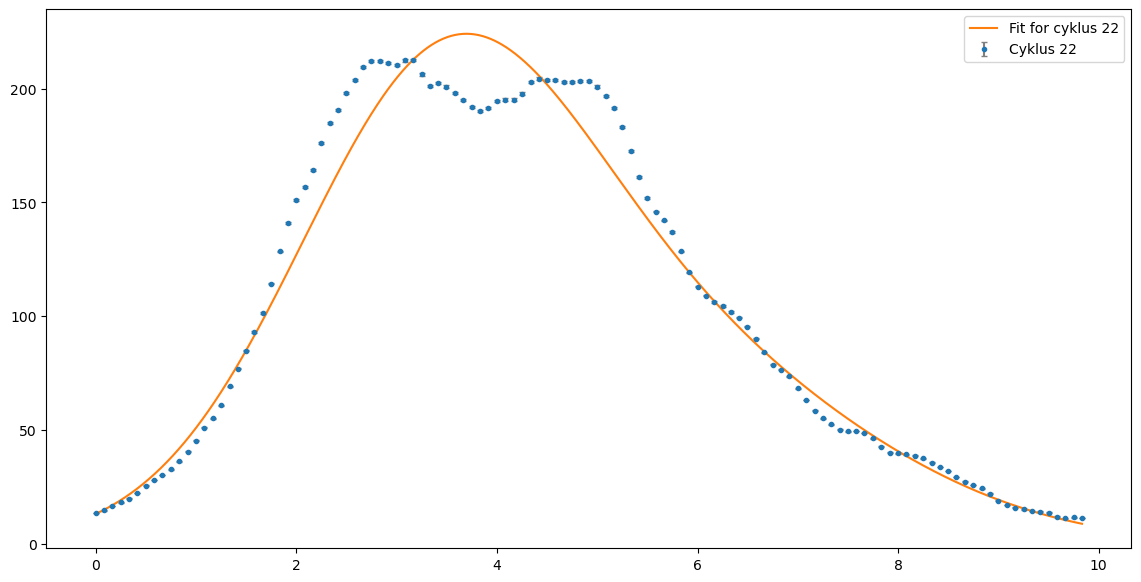

In [ ]:
fit(22, p0=[3.1, 5.9, 0.01, 0.02, 100, 1000])